In [120]:
from datetime import datetime

import numpy as np
import pandas as pd

from sklearn import preprocessing 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn import svm
from sklearn.kernel_ridge import KernelRidge

import matplotlib.pyplot as plt

FAMA_49CRSP = 'FAMA_49CRSP.csv'

In [3]:
# https://keras.io/regularizers/
# https://keras.io/callbacks/
# https://en.wikipedia.org/wiki/Kriging
# https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e
# https://www.tensorflow.org/guide/summaries_and_tensorboard
# https://stackoverflow.com/questions/50978117/how-to-plot-loss-curve-in-tensorflow-without-using-tensorboard
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/normalize
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
# https://datascience.stackexchange.com/questions/989/svm-using-scikit-learn-runs-endlessly-and-never-completes-execution

# http://jack.valmadre.net/notes/2014/09/03/ridge-regression-dual/

In [194]:
def read_csv(filename):
    """
    Read in CSV file of financial ratios and returns a pandas dataframe.
    df is sorted by date in ascending order. 
    """
    df = pd.read_csv(filename)
    
    df = df.drop(labels=['pe_op_basic_Median', 'pe_op_dil_Median', 'PEG_1yrforward_Median', 'PEG_ltgforward_Median'], axis=1)
    df = df.dropna()
    df = df.sort_values(by='public_date', ascending=True)
    
    return df

In [195]:
read_csv('ee6d2f60cdafb550.csv')

,public_date,FFI49_desc,NFIRM,indret_ew,indret_vw,dpr_Median,PEG_trailing_Median,bm_Median,CAPEI_Median,divyield_Median,...,inv_turn_Median,pay_turn_Median,rect_turn_Median,sale_equity_Median,sale_invcap_Median,sale_nwc_Median,accrual_Median,rd_sale_Median,adv_sale_Median,staff_sale_Median
0,19700131,AERO,8,-0.117325,-0.149955,0.000,1.356,0.696,8.490,4.76%,...,4.317,17.439,8.843,4.416,3.019,7.479,0.021,0.000,0.000,0.388
39,19700131,UTIL,47,-0.032949,-0.043141,0.106,1.344,0.622,11.110,6.64%,...,13.052,8.312,8.225,0.760,0.364,25.478,0.033,0.000,0.000,0.209
37,19700131,TRANS,14,-0.068535,-0.073527,0.082,0.773,1.301,9.410,5.74%,...,16.314,8.271,9.358,1.348,0.820,27.673,0.043,0.000,0.000,0.190
36,19700131,TOYS,4,-0.044872,-0.035847,0.000,0.900,0.198,17.178,3.57%,...,5.022,14.150,6.496,3.381,3.155,4.597,0.026,0.000,0.000,0.000
35,19700131,TELCM,8,-0.067678,-0.023545,0.000,1.785,0.292,14.958,3.14%,...,5.192,6.393,7.764,1.416,0.901,4.028,0.026,0.000,0.000,0.000
34,19700131,STEEL,25,-0.068294,-0.063238,0.011,0.331,0.834,9.967,5.45%,...,3.769,9.364,8.878,1.442,0.993,4.014,0.014,0.000,0.000,0.000
33,19700131,SODA,8,-0.011130,-0.026951,0.000,3.000,0.283,15.213,3.98%,...,7.400,26.637,15.519,2.559,2.541,6.140,0.029,0.000,0.000,0.000
32,19700131,SMOKE,6,-0.027493,-0.071631,0.009,1.413,0.755,11.354,5.90%,...,0.982,24.881,9.311,1.858,1.306,2.043,-0.056,0.000,0.000,0.000
30,19700131,RTAIL,27,-0.056199,-0.059770,0.000,2.129,0.673,13.637,3.57%,...,5.281,17.836,30.907,4.600,3.510,8.853,0.008,0.000,0.000,0.000
29,19700131,PAPER,9,-0.085591,-0.098263,0.004,1.045,0.671,15.005,4.04%,...,5.329,13.799,9.149,1.581,1.116,5.706,0.038,0.000,0.000,0.293


In [196]:
def pct_format(col): 
    temp = [float(x[:-1]) if x is not np.nan else 0 for x in col]
    return pd.Series(temp)

In [197]:
def write_csv(filename):
    """
    Read in CSV file of financial ratios and returns a pandas dataframe.
    Drops empty columns and reformats a str col into a float col. 
    df is sorted by date in ascending order. 
    """
    df = read_csv(filename)
    
    df['divyield_Median'] = pct_format(df['divyield_Median'])
    
    df.to_csv('FAMA_49CRSP.csv')

In [200]:
write_csv('ee6d2f60cdafb550.csv')

In [199]:
def encode(df, col):
    """
    Takes in pandas dataframe and encodes df.col as numbers. 
    """
    encoder = preprocessing.LabelEncoder()
    industry_desc_encode = encoder.fit_transform(df[col])
    df[col] = industry_desc_encode
    return df 

In [162]:
def calc_rolling_avg(col, n_years):
    """
    3 years rolling percent change, averaged ie. (y1-y2 + (y3-y2)change)/2 
    """
    return col.rolling(n_years).mean()

In [163]:
def calc_year_on_year(col, p):
    """
    3year on year change as a prediction feature, raw pct change
    """
    return col.diff(periods=p)

In [164]:
def chop(col, index):
    return col.iloc[index:]

In [165]:
def discretize(series, n_bins):
    #add -1 and 1 so the bins will take on bins to be equal and set to max -1 and 1
    endpoints = pd.Series([-1,1])
    series = series.append(endpoints)

    #make a new output (bucket by percentage?)
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal',strategy = 'uniform')
    series = np.asarray(series).reshape((-1,1))

    labels_binned = discretizer.fit_transform(series)

    return labels_binned[:-2]

In [166]:
def process_data():
    """
    Reads in a CSV file and encodes text columns. 
    Removes indret_ew, indret_vw from df. 
    Returns df (X matrix) and ew_indret (Y values )
    """
    df = pd.read_csv(FAMA_49CRSP, header=0, dtype={'public_date' : str})
    df = encode(df, 'FFI49_desc')
    
    ew_indret, vw_indret = df.indret_ew, df.indret_vw 
    
    df = df.drop(labels=['indret_ew', 'indret_vw'], axis=1)
    
    rolling_avg = calc_rolling_avg(ew_indret, 3)
    year_on_year = calc_year_on_year(ew_indret, 3) 
    
    df, ew_indret, year_on_year, rolling_avg = chop(df, 3), chop(ew_indret, 3), chop(year_on_year, 3), chop(rolling_avg, 3) 
    
    ew_binned = discretize(ew_indret, 8)
    
    return df, ew_indret, ew_binned, year_on_year, rolling_avg

In [201]:
def split_data(x, y): 
    """
    Splits data into 0.64 Train, 0.16 dev, 0.2 Test
    """
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = False)
    x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size = 0.2, shuffle = False)
    
    return x_train, x_test, x_dev, y_dev, y_train, y_test

In [202]:
def dev(model, x_train, y_train, x_dev, y_dev):
    # also try RMSE? 
    y_train_predict = model.predict(x_train)
    train_mse = metrics.mean_squared_error(y_train, y_train_predict)
    
    y_dev_predict = model.predict(x_dev)
    mse = metrics.mean_squared_error(y_dev, y_dev_predict)
    r2 = metrics.r2_score(y_dev, y_dev_predict)
    
    print('R2: {}\tMSE: {}'.format(r2, mse))
    return y_train_predict, y_dev_predict

In [169]:
# Ordinary Least Squares: MSE 0.0064 
# ElasticNet: MSE 0.0047
# Ridge: MSE 0.0065
# Kernel Ridge Regression: MSE 0.0050
# Lasso: MSE 0.00456

def train_Ridge(alpha, x_train, y_train):
    reg = linear_model.Ridge(alpha=alpha)
    reg.fit(x_train, y_train) 

    return reg

def train_Lasso(alpha, x_train, y_train):
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(x_train, y_train)
    return clf
    
def train_ElasticNet(alpha, x_train, y_train):
    reg = linear_model.ElasticNet(alpha=alpha)
    reg.fit(x_train, y_train) 

    return reg

def train_SVR(x_train, y_train):
    """
    Takes scaled training data (does not converge otherwise) 
    """
    x_train = preprocessing.scale(x_train)
    x_dev = preprocessing.scale(x_dev)

    reg = svm.SVR(kernel='poly', gamma='auto')
    reg.fit(x_train, y_train) 

    return reg, x_dev, y_dev

def train_KRR(alpha, x_train, y_train):
    """
    Takes scaled training data (to avoid singular matrix problem? )
    """
    KRR = KernelRidge(alpha=alpha)
    KRR.fit(x_train, y_train)
    return KRR

In [170]:
df, ew_indret, ew_binned, year_on_year, rolling_avg = process_data()
x_train, x_test, x_dev, y_dev, y_train, y_test = split_data(df, ew_indret) 

In [171]:
scaled_x = preprocessing.scale(x_train)
scaled_x_dev = preprocessing.scale(x_dev)

KRR = train_KRR(0.3, , y_train)
KRR_train_predict, KRR_dev_predict = dev(KRR, scaled_x, y_train, scaled_x_dev, y_dev)

graph(x_train, y_train, KRR_train_predict, 0)
graph(x_dev, y_dev, KRR_dev_predict, 0)

/home/klchou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/klchou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  
/home/klchou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  


R2: -0.0704178846774457	MSE: 0.004923484831678661


NameError: name 'krr_train_predict' is not defined

/home/klchou/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


R2: -0.006117898641839092	MSE: 0.004627731172799116


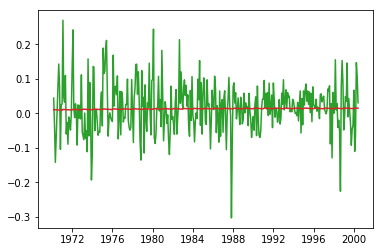

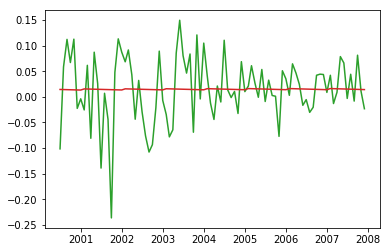

In [173]:
lasso = train_Lasso(0.5, x_train, y_train)
lasso_train_predict, lasso_dev_predict = dev(lasso,  x_train, y_train, x_dev, y_dev)

graph(x_train, y_train, lasso_train_predict, 0)
graph(x_dev, y_dev, lasso_dev_predict, 0)

/home/klchou/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.00505274667044961
R2: -0.006484043066993461	MSE: 0.004629415287525949


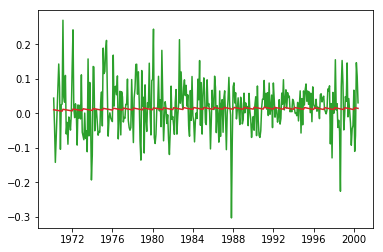

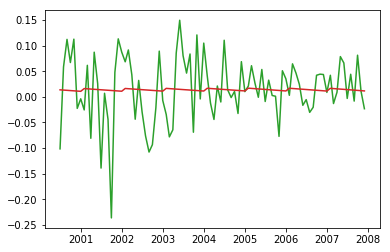

In [152]:
elastic_net = train_ElasticNet(0.5, x_train, y_train)
elasticnet_train_predict, elasticnet_dev_predict = dev(elastic_net,  x_train, y_train, x_dev, y_dev)

graph(x_train, y_train, elasticnet_train_predict, 0)
graph(x_dev, y_dev, elasticnet_dev_predict, 0)

In [153]:
# for industry in x_train['FFI49_desc'].unique():

In [136]:
def graph(x, y_real, y_pred, industry):
    x_industry = x[x['FFI49_desc'] == industry]
    y_industry = y_real[x['FFI49_desc'] == industry]
    y_pred = y_pred[x['FFI49_desc'] == industry]
    x = [datetime(year=int(x[0:4]), month=int(x[4:6]), day=int(x[6:8])) for x in x_industry['public_date']] 
    
    plt.plot(x ,y_industry, color='tab:green')
    plt.plot(x, y_pred, color='tab:red')
    plt.show()
    

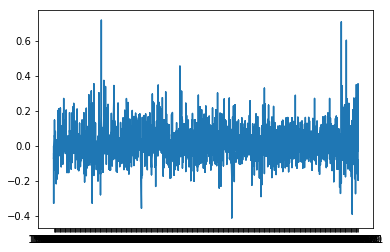